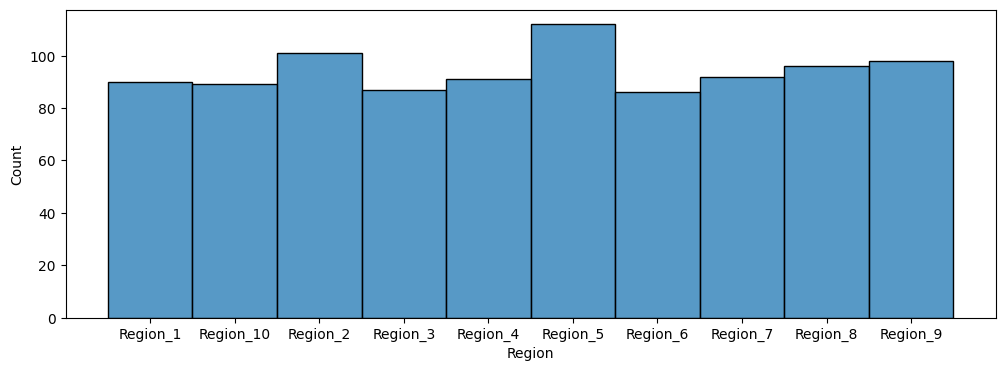

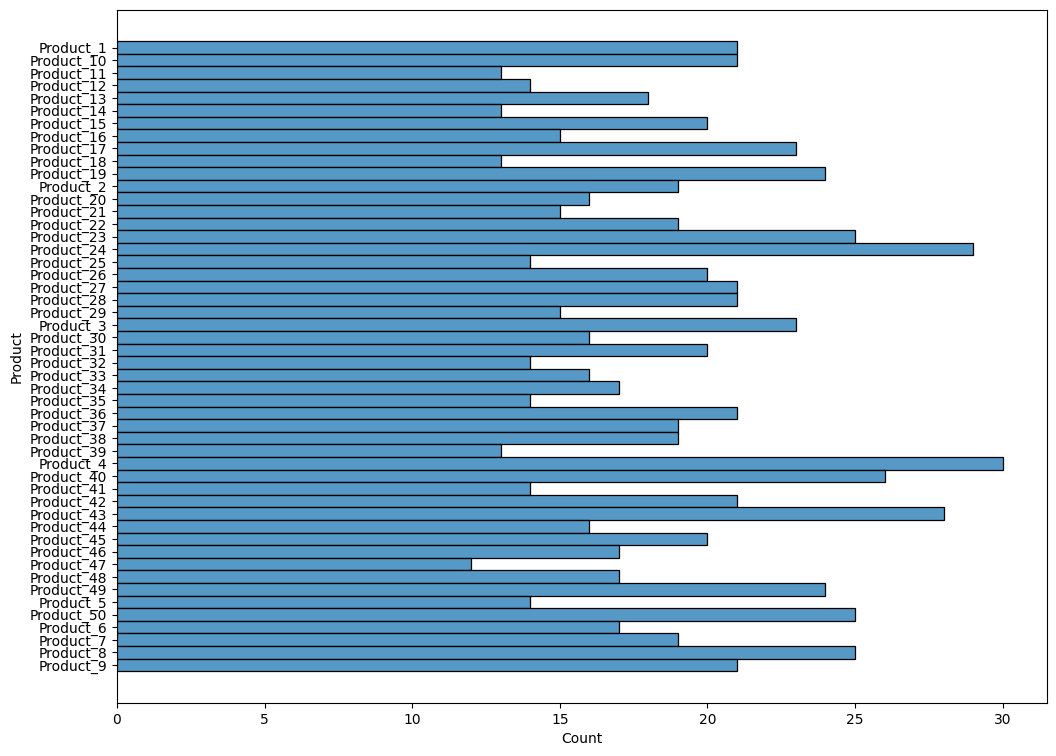

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [8]:
#import library.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Reading the sales_data csv file, loading the dataset.
df = pd.read_csv("C:/data_science/sales_data.csv")


#Showing how the original dataset look like in 'Region'.
fig= plt.subplots(figsize=(12,4))
sns.histplot(
    data = df.sort_values(by='Region'),
    x = 'Region'

)
plt.show()
#Showing how the original dataset look like in 'Product'
fig= plt.subplots(figsize=(12,9))
sns.histplot(
    data = df.sort_values(by='Product'),
    y = 'Product'
)
plt.show()
#Checking the column 'Sale Date' contains Nan or not, and I will use it to determine the missing values of the rests in the dataset.
print(df['Sale Date'].isnull().values.any())
#Checking are there missing values in all columns, based on the sales date
df.info()

In [9]:
#Loading to a new dataset name df3, in order to avoid any changes to the original dataset.
df3 = df
#Droping the missing value in the column 'Product' and 'Region' of the dataset.
df3=df3.dropna(subset=['Product','Region'])
#Checking the count with non-null is same as the count of Sale Date
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     851 non-null    object 
 1   Region      851 non-null    object 
 2   Price       766 non-null    float64
 3   Units Sold  762 non-null    float64
 4   Sale Date   851 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.9+ KB


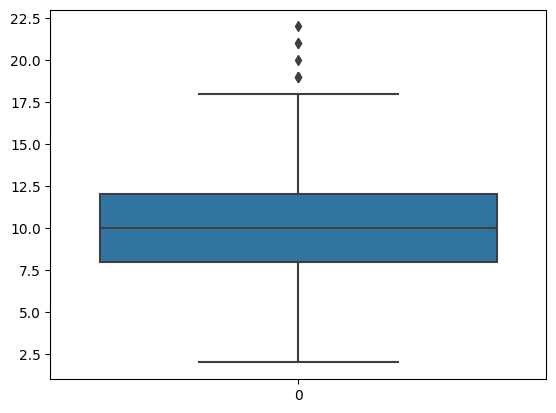

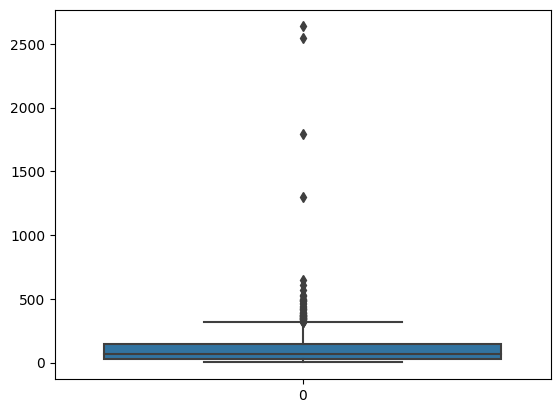

In [3]:
#Checking the outlier
sns.boxplot(df['Units Sold'])
plt.show()
#Checking the outlier
sns.boxplot(df['Price'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     847 non-null    object 
 1   Region      847 non-null    object 
 2   Price       847 non-null    float64
 3   Units Sold  847 non-null    float64
 4   Sale Date   847 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.7+ KB


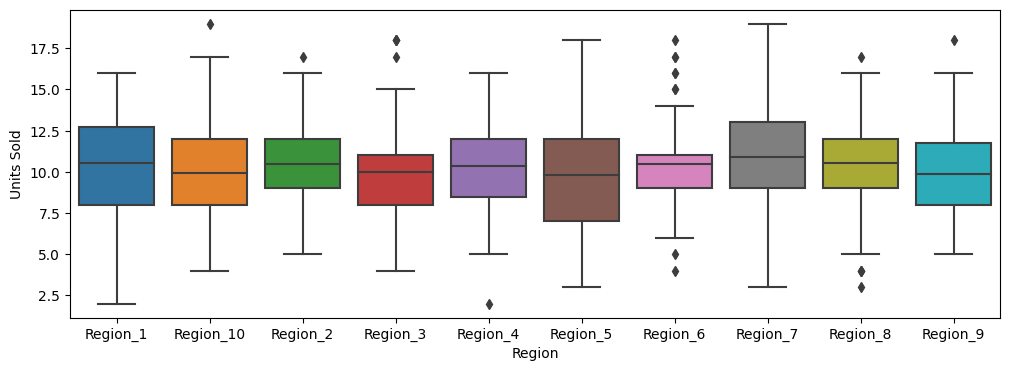

In [17]:
#Fill in the missing values of the corresponding "Units Sold" with the average values of different regions.
#Fill in the missing values of the corresponding "Product" with the median of different regions.
df3.loc[:,'Units Sold']=df3['Units Sold'].fillna(df3.groupby('Region')['Units Sold'].transform('mean'))
df3.loc[:,'Price']=df3['Price'].fillna(df3.groupby('Region')['Price'].transform('median'))
#upper_limit = 18

upper_limit = df3['Units Sold'].mean() + 3*df3['Units Sold'].std()
lower_limit = df3['Units Sold'].mean() - 3*df3['Units Sold'].std()

df4_filtered_Sold = df3[(df3["Units Sold"] < upper_limit)]
df4_filtered_Sold =df4_filtered_Sold[(df4_filtered_Sold["Units Sold"] > lower_limit)]
#df4_filtered_Sold = df4[(df4["Units Sold"] < upper_limit)]

df4_filtered_Sold.info()
fig= plt.subplots(figsize=(12,4))
sns.boxplot(
    data= df4_filtered_Sold.reset_index().sort_values(by='Region'),
    x='Region',
    y='Units Sold'
)
plt.show()


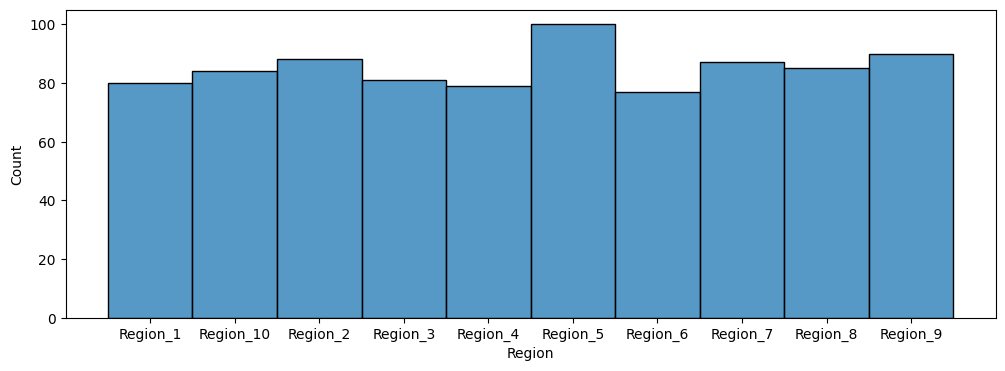

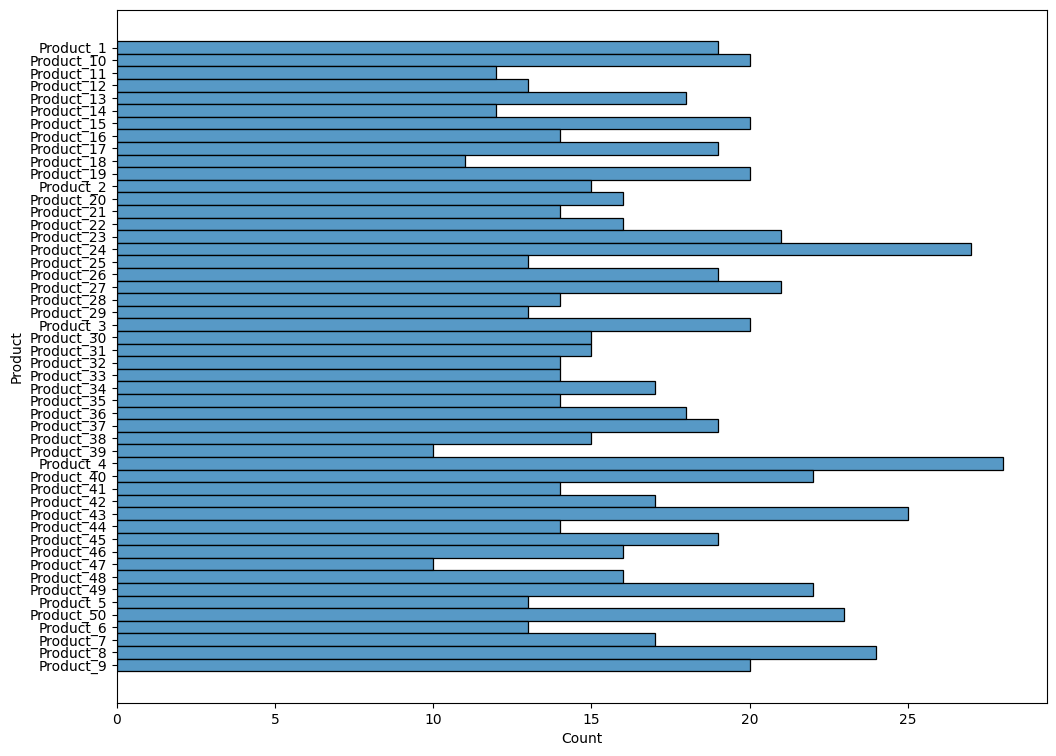

In [5]:

fig= plt.subplots(figsize=(12,4))
sns.histplot(
    data = df4_filtered_Sold.sort_values(by='Region'),
    x = 'Region'

)
plt.show()
fig= plt.subplots(figsize=(12,9))
sns.histplot(
    data = df4_filtered_Sold.sort_values(by='Product'),
    y = 'Product'
)
plt.show()


In [ ]:
#Q 1) What conclusions can you draw about sales performance of various products and regions?
#Answer: Based on the original dataset, we can see that product_4, product_43, or product_24 were the most sold product. 
#        In the region_2 and region_5 were the region where the products were most sold.  
#        Based on the dataset after cleanning, it shown on the same thing as I said above.


#Q 2) What recommendations do you have for the business?
#Answer: 
#        I will suggest that the company can mainly focus on the specific product, like product_4, product_43, or product_24, 
#        to expand the market on other regions. And try to delete some product development, 
#        such as Product 47 and Product 18, to reduce the budget for development. And the company can focus on the Region_6 to 
#        expand its sales units, because in its boxplot, 
#        people in that region generally have consistency in selling units of the product.

#Q 3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
#Answer: I have written down the note in detail beside the code. Here I will explain why I use the way to clean the data. In this dataset, 
#          I figured out that there are the date of the sales, unit sold, product name, product price, and region name. And I decided to 
#          know about the relationship between Unit Sold and the different regions without any Unknow regions. 
#          Because there were Nan values in Product name and Region name based on the code 'info()' and the sales date info, 
#          and the total number with Nan values does not account for huge percents of the total number of the row in the dataset. 
#          I decided to remove all the row with Nan value in the column 'Product' and 'Region'. And there are still missing value in 'Price'
#          and 'Unit Sold'. After the checking of both boxplots, 'Price' has so many outliers, but 'Unit Sold' has few of them.
#          I think that the reason there are many outliers in 'Price' because it varies from region to region. For this part, I try to use
#          its mean value to represent the missing value. And I decided to use median value to fill up the Nan value in 'Unit Sold', because
#          there are only few outliers in the entire view. And finally, all the missing value in the dataset are cleanned.
